<a href="https://colab.research.google.com/github/Jananisudhakar007/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


In [ ]:
# dataset
disease_df = pd.read_csv("/content/framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [ ]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [ ]:
#Splitting the Dataset into Test and Train Sets
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


<ipython-input-5-22dca55f9c4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


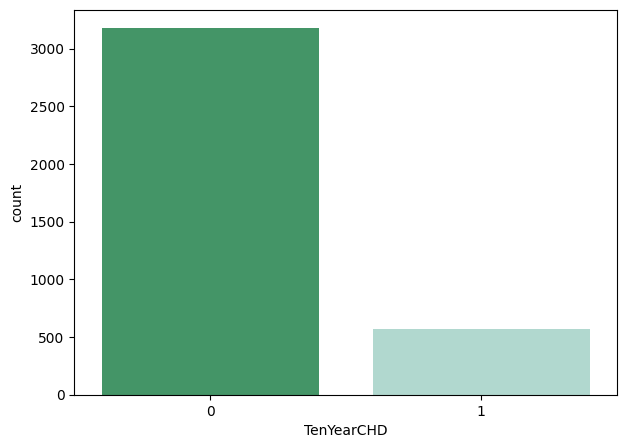

In [ ]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

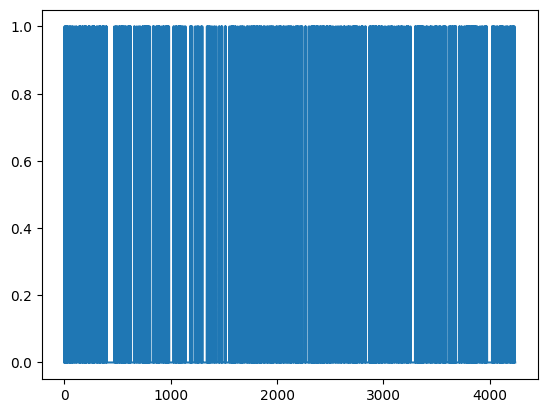

In [ ]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [ ]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8490230905861457


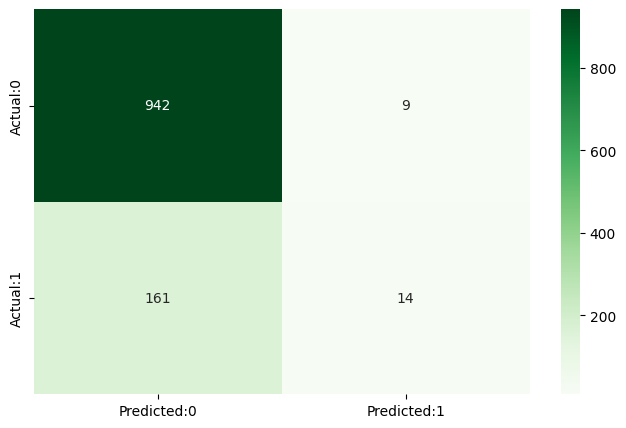

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))


ROC-AUC Score: 0.7251254318762205


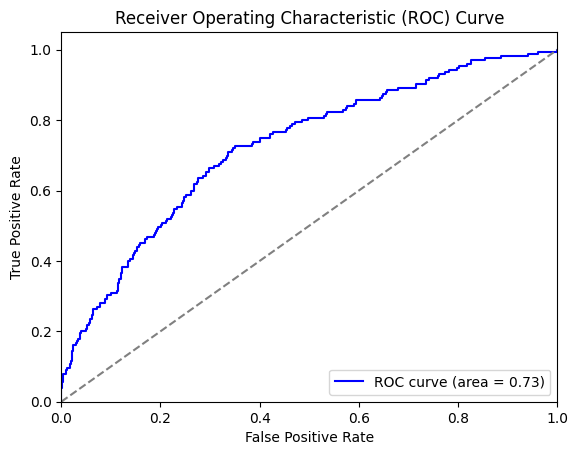

In [ ]:
# Import necessary libraries for ROC-AUC score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Fit the logistic regression model (assuming you've already split your data into X_train, X_test, y_train, y_test)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 3: Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

# Step 4: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

# Calculate ROC-AUC for Naive Bayes
y_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
print(f"Naive Bayes ROC-AUC Score: {roc_auc_nb}")


Naive Bayes Accuracy: 0.8321492007104796
Confusion Matrix:
[[910  41]
 [148  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       951
           1       0.40      0.15      0.22       175

    accuracy                           0.83      1126
   macro avg       0.63      0.56      0.56      1126
weighted avg       0.79      0.83      0.80      1126

Naive Bayes ROC-AUC Score: 0.7239447198437736


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

# Calculate ROC-AUC for KNN
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
print(f"KNN ROC-AUC Score: {roc_auc_knn}")


KNN Accuracy: 0.8303730017761989
Confusion Matrix:
[[915  36]
 [155  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       951
           1       0.36      0.11      0.17       175

    accuracy                           0.83      1126
   macro avg       0.61      0.54      0.54      1126
weighted avg       0.78      0.83      0.79      1126

KNN ROC-AUC Score: 0.618332582244254


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

# Calculate ROC-AUC for Decision Tree
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
print(f"Dsecision Tree ROC-AUC Score: {roc_auc_dt}")


Decision Tree Accuracy: 0.7477797513321492
Confusion Matrix:
[[796 155]
 [129  46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       951
           1       0.23      0.26      0.24       175

    accuracy                           0.75      1126
   macro avg       0.54      0.55      0.55      1126
weighted avg       0.76      0.75      0.75      1126

Decision Tree ROC-AUC Score: 0.5499354063391919


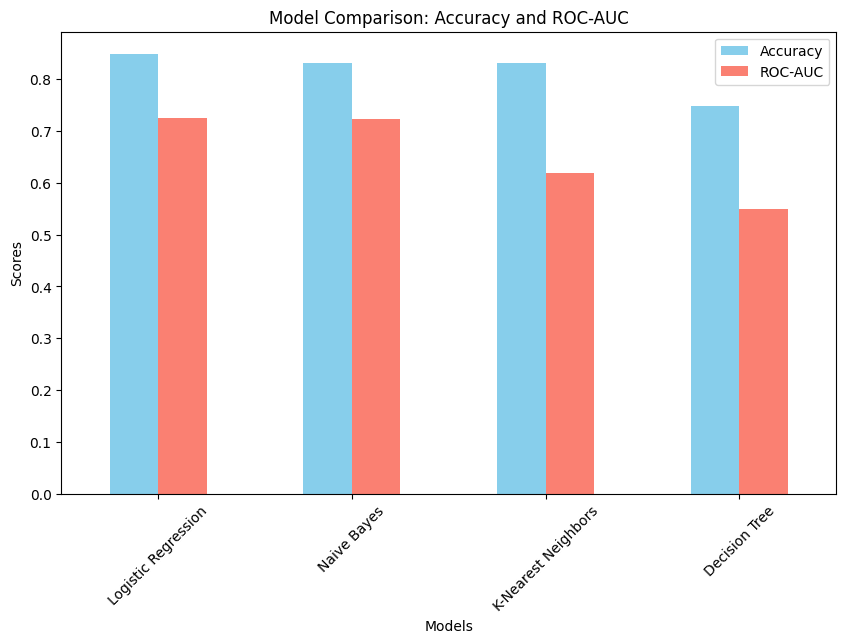

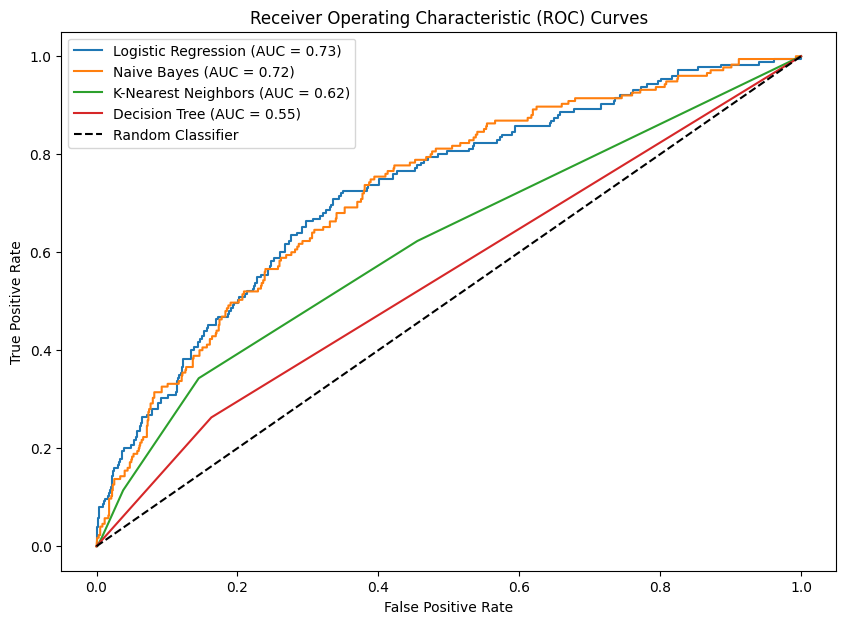

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Load the dataset
disease_df = pd.read_csv("/content/framingham.csv")
disease_df.drop(['education'], inplace=True, axis=1)
disease_df.rename(columns={'male': 'Sex_male'}, inplace=True)
disease_df.dropna(axis=0, inplace=True)

# Splitting the Dataset into Train and Test Sets
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# Normalization of the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-and-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Function to train, predict, and evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    return accuracy, roc_auc, y_pred_prob

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Storing results
results = {}
roc_curves = {}

for name, model in models.items():
    accuracy, roc_auc, y_pred_prob = evaluate_model(model, name)
    results[name] = {"accuracy": accuracy, "roc_auc": roc_auc}
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_curves[name] = (fpr, tpr)

# Visualize Performance Comparison

# Bar chart for Accuracy and ROC-AUC Scores
df_results = pd.DataFrame(results).T
df_results.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Model Comparison: Accuracy and ROC-AUC')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(['Accuracy', 'ROC-AUC'])
plt.show()

# Plotting ROC Curves for each model
plt.figure(figsize=(10, 7))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
